Duration: 0:00:00.703789
creating a society...
Depending on population size, it may take a while longer
You chose a population of 100000Occupiers!
Version 009 clocked 1000000 in:- Duration: 0:04:10.704857
Population count = 100000
total gender distribution equals 100%
Assigning random genders to occupiers...
Creating jobs...
Duration: 0:00:00.757758
Creating jobs is easy!
Creating specific occupations...
Duration: 0:00:26.046701
This one was a bit trickier!
Creating pie charts...


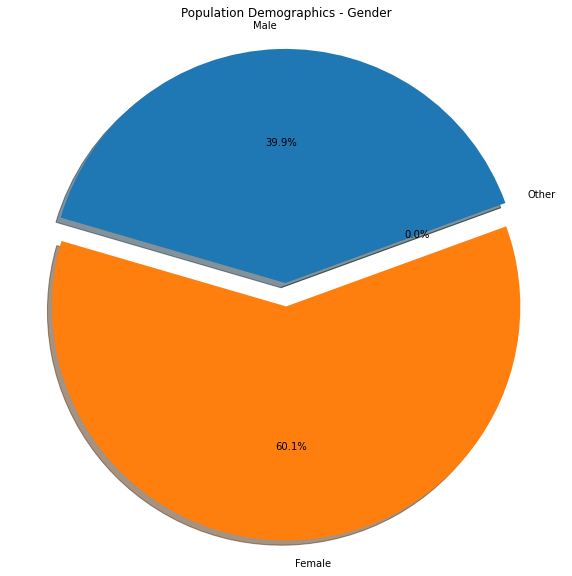

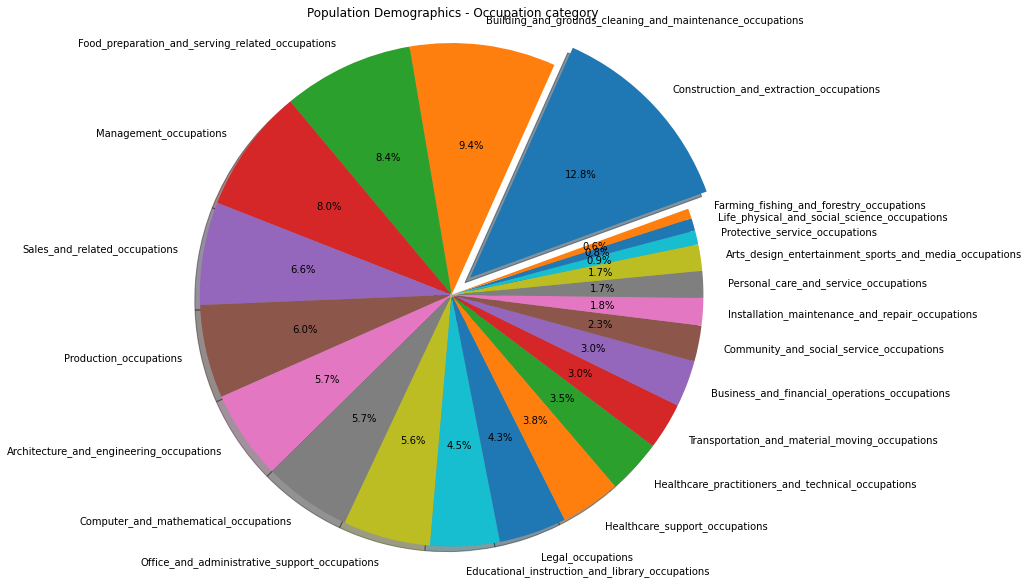

Duration: 0:00:26.762467
End Script!


In [1]:
#Imports
from datetime import datetime
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
%matplotlib inline

start_time = datetime.now()  #Timer start

#Ons and Offs
Windows_version = 1 #Run excel datafile on Windows  =1, or MacOS =0 (edited excel version for better usability)
display_population_data = 0 # =1 is On =0 is Off
display_demographic_figures = 1
    #Data quality check
data_test = 1 # edit to =1 if on, =0 if off

#Variables
population_size = 100000 # 1 million takes a little over 4 minutes to generate population

#Load database file(s)
#Source: Employment Projections program, U.S. Bureau of Labor Statistics

#for Windows 
if Windows_version ==1:
    xls = pd.ExcelFile(r'C:\Users\Nasim\Desktop\Evolution_game_project\occupation_canedit.xlsx')
else:
    #for Mac
    xls = pd.ExcelFile(r'/Users/nasimnassar/Desktop/OccupyEvolution/occupation_canedit.xlsx')
#Random seeds
#Fixed seed

#Load sheets as dataframes
df1 = pd.read_excel(xls, 'Table 1.2') #Main Database
df2 = pd.read_excel(xls, 'Table 1.3')

#Headers
Occupation_titles = df1['2019 National Employment Matrix title'].tolist()
Occupation_code = df1['2019 National Employment Matrix code'].tolist()
Occupation_type = df1['Occupation type'].tolist()
Occupation_2019 = df1['Employment, 2019'].tolist()
Occupation_2029 = df1['Employment, 2029'].tolist()
Occupation_percent_2019 = df1['Employment distribution, percent, 2019'].tolist()
Occupation_percent_2029 = df1['Employment distribution, percent, 2029'].tolist()
Occupation_change_numeric = df1['Employment change, numeric, 2019-29'].tolist()
Occupation_change_percent = df1['Employment change, percent, 2019-29'].tolist()
Occupation_annual_average = df1['Occupational openings, 2019-29 annual average'].tolist()

#Edit headers into usable strings
Employment_titles = [0]*len(Occupation_titles)
count = 0        
for i in range(len(Occupation_titles)):
    count += 1
    Employment_titles_temp = Occupation_titles[count-1].replace(' ', '_')
    Employment_titles_temp2 = Employment_titles_temp.replace(',', '')
    Employment_titles[count-1] = Employment_titles_temp2
#print(Employment_titles)

#Add additional strings "_all" & "_sum"
Employment_titles_all = [0]*len(Employment_titles)
Employment_titles_sum = [0]*len(Employment_titles)
count = 0
for i in range(len(Employment_titles)):
    count += 1
    Employment_titles_all[count-1] = Employment_titles[count-1] + '_all'
    Employment_titles_sum[count-1] = Employment_titles[count-1] + '_sum'
#print(Employment_titles_all)
#pring(Employment_titles_sum)

#Define top and subcategories
# Occupation (all) top and sub-categories (Summary vs Line item) and index
Occupation_code_allcategories = df1['2019 National Employment Matrix code'].loc[df1['Occupation type'] == 'Summary']
Occupation_code_allcategories_index = Occupation_code_allcategories.index
# Occupation code top categories and index
Occupation_code_topcategories = df1[df1['2019 National Employment Matrix code'].str.contains('-0000', regex=False)]
Occupation_code_topcategories_index = Occupation_code_topcategories.index
# Line item occupations and index
Occupation_code_lineitems = df1.loc[df1['Occupation type'] == 'Line item']
Occupation_code_lineitems_index = Occupation_code_lineitems.index
# Line item occupation numbers and index
Occupation_name_lineitems = df1['Employment, 2019'].loc[df1['Occupation type'] == 'Line item']
Occupation_name_lineitems_index = Occupation_name_lineitems.index


#Empty lists
Matrix_code_topcategories = [0]*len(Employment_titles)
Matrix_code_subcategories = [0]*len(Employment_titles)
Matrix_code_lineitems = [0]*len(Employment_titles)
Matrix_code_subsubcategories = [0]*len(Employment_titles)

Employment_titles_topcategories = [0]*len(Employment_titles)
Employment_titles_subcategories = [0]*len(Employment_titles)
Employment_titles_lineitems = [0]*len(Employment_titles)
Employment_titles_subsubcategories = [0]*len(Employment_titles)

Occupation_2019_numbers_top = [0]*len(Employment_titles)
Occupation_2019_numbers_sub = [0]*len(Employment_titles)
Occupation_2019_numbers_lineitem = [0]*len(Employment_titles)
Occupation_2019_numbers_subsub = [0]*len(Employment_titles)

#Separate top and subcategories from actual employment titles
count = 0
for i in range(len(Employment_titles)):
    count += 1
    # separate "Summary" from "Line item"
    if i in Occupation_code_allcategories_index:
        #Separate top categories from sub categories (1st level)
        if str('-0000') in Occupation_code[i]:
            Matrix_code_topcategories[i] = Occupation_code[i]
            Employment_titles_topcategories[i] = Employment_titles[i]
            Occupation_2019_numbers_top[i] = Occupation_2019[i]
        else:
            if str('000') in Occupation_code[i]:
                # if separate sub (2nd level) from subsub (3rd level category) 
                Matrix_code_subcategories[i] = Occupation_code[i]
                Employment_titles_subcategories[i] = Employment_titles[i]
                Occupation_2019_numbers_sub[i] = Occupation_2019[i]
            else:
                Matrix_code_subsubcategories[i] = Occupation_code[i]
                Employment_titles_subsubcategories[i] = Employment_titles[i]
                Occupation_2019_numbers_subsub[i] = Occupation_2019[i]
    # if "Line item" (4th level)
    else:
        Matrix_code_lineitems[i] = Occupation_code[i]
        Employment_titles_lineitems[i] = Employment_titles[i]
        Occupation_2019_numbers_lineitem[i] = Occupation_2019[i]

#print(Matrix_code_topcategories)    
#print(Employment_titles_topcategories)       
#print(Matrix_code_subcategories)    
#print(Employment_titles_subcategories)
#print(Matrix_code_lineitems)    
#print(Employment_titles_lineitems)

# Quality Check!
Percent_employments_2019 = [0]*len(Employment_titles)
Number_employments_2019 = [0]*len(Employment_titles)
count=0
if data_test == 1:
    total_occupation_number = Occupation_2019_numbers_top[0]
    temp = Occupation_2019_numbers_top
    del temp[0]
    Occupation_2019_numbers_top_sum = sum(temp)
    Occupation_2019_numbers_sub_sum = sum(Occupation_2019_numbers_sub)
    Occupation_2019_numbers_lineitem_sum =sum(Occupation_2019_numbers_lineitem)
    Occupation_2019_numbers_subsub_sum = sum(Occupation_2019_numbers_subsub)
    
#print(Occupation_2019_numbers_top_sum)
#print(Occupation_2019_numbers_sub_sum)
#print(Occupation_2019_numbers_lineitem_sum)
#print(Occupation_2019_numbers_subsub_sum)

#New precentages
Occupation_percent_2019_new = [0]*len(Occupation_percent_2019)
Occupation_percent_2029_new = [0]*len(Occupation_percent_2029)
for i in range(len(Occupation_percent_2019)):
    Occupation_percent_2019_new[i] = (Occupation_2019[i]/Occupation_2019[0])*100
    Occupation_percent_2029_new[i] = (Occupation_2029[i]/Occupation_2029[0])*100
#print(sum(Occupation_percent_2019_new))
#print(sum(Occupation_percent_2019))


#Probability of being in any top category
reduced_Employment_titles_topcategories = [i for i in Employment_titles_topcategories if i != 0]
del reduced_Employment_titles_topcategories[0]
#reduced_Employment_titles_topcategories
probability_for_top_category = [0]*len(Occupation_code_topcategories_index)
count=0
for i in Occupation_code_topcategories_index:
    count +=1
    probability_for_top_category[count-1] = Occupation_percent_2019_new[i]
del probability_for_top_category[0]
#probability_for_top_category

#timer
mean_time = datetime.now() #Timer end
print('Duration: {}'.format(mean_time - start_time))

#Create society
print('creating a society...')
print('Depending on population size, it may take a while longer')

#Define population size
print('You chose a population of ' + str(population_size) + 'Occupiers!')
print('Version 009 clocked 1000000 in:- Duration: 0:04:10.704857')

print('Population count = ' + str(population_size))

#Define genders 
# if exactly 0, 0.5, or 1.0 other (in random distribution 0<x<1, however not taken into account, maybe later at some point?)
gender = ['Male', 'Female', 'Other']
#Define gender bias # 0.01 to 0.49 female dominant, 0.51 - 0.99 male dominant
gender_bias = 0.4
gender_other = 0.000001
#Distributions
gender_distribution_male = (1 - gender_other)*gender_bias
gender_distribution_female = (1 - gender_other)*(1-gender_bias)

if gender_distribution_female + gender_distribution_male + gender_other ==1:
    print('total gender distribution equals 100%')
else:
    if abs(1-(gender_distribution_female + gender_distribution_male + gender_other)) < 0.0001:
        print('total gender distribution almost equals 100%')
    else:
        print('gender distribution error!')

#create individuals with genders
print('Assigning random genders to occupiers...')
population_gender = random.choices(population=gender,
                                   weights=[gender_distribution_male, 
                                            gender_distribution_female, 
                                            gender_other],
                                   k=population_size)
population_df = pd.DataFrame(population_gender)

#Create individual occupation
print('Creating jobs...')
#Assign top category
individual_occupation_top_category = random.choices(population=reduced_Employment_titles_topcategories,
                                                    weights=probability_for_top_category,
                                                    k=population_size)
#print(individual_occupation_top_category)

#timer
mean_time = datetime.now() #Timer end
print('Duration: {}'.format(mean_time - start_time))

print('Creating jobs is easy!')

population_df = pd.DataFrame(list(zip(population_gender, individual_occupation_top_category)),
                columns =['Gender', 'top category'])

#Assign sub category
print('Creating specific occupations...')
lower_boundary_topcategory = [0]*population_size
upper_boundary_topcategory = [len(Employment_titles)]*population_size
individual_occupation_sub_category = [0]*population_size
#individual_occupation_sub_category
count = 0
for i in individual_occupation_top_category:
    count += 1
    #Where top category starts
    lower_boundary_topcategory[count-1] = Employment_titles.index(i)
    #Where top category ends
    for ii in Occupation_code_topcategories_index:
        #print(lower_boundary_topcategory)
        if ii > lower_boundary_topcategory[count-1]:
            upper_boundary_topcategory[count-1] = ii
            probability_for_sub_category = Occupation_percent_2019_new[lower_boundary_topcategory[count-1]+1:
                                                                       upper_boundary_topcategory[count-1]-1]
            temp2 = [x for x in Occupation_name_lineitems_index 
                     if lower_boundary_topcategory[count-1] <= x <= upper_boundary_topcategory[count-1]]
            Number_employments_2019_subcategory = [0]*len(temp2)
            individual_occupation_sub_categories = [0]*len(temp2)
            count2=0
            for i in temp2:
                count2 += 1
                Number_employments_2019_subcategory[count2-1] = Occupation_2019[i]
                individual_occupation_sub_categories[count2-1] = Employment_titles[i]
            #print(Number_employments_2019_subcategory)
            
            probability_for_sub_category_new = [x / Occupation_2019[lower_boundary_topcategory[count-1]] for x in Number_employments_2019_subcategory]
            
            individual_occupation_sub_category[count-1] = random.choices(population=individual_occupation_sub_categories,
                                                                         weights=probability_for_sub_category_new,
                                                                         k=1)
            break
        if ii == max(Occupation_code_topcategories_index):
            upper_boundary_topcategory[count-1] = len(Employment_titles)
            probability_for_sub_category = Occupation_percent_2019_new[lower_boundary_topcategory[count-1]+1:
                                                                       upper_boundary_topcategory[count-1]-1]
            temp2 = [x for x in Occupation_name_lineitems_index 
                     if lower_boundary_topcategory[count-1] <= x <= upper_boundary_topcategory[count-1]]
            Number_employments_2019_subcategory = [0]*len(temp2)
            individual_occupation_sub_categories = [0]*len(temp2)
            count2=0
            for i in temp2:
                count2 += 1
                Number_employments_2019_subcategory[count2-1] = Occupation_2019[i]
                individual_occupation_sub_categories[count2-1] = Employment_titles[i]
            #print(Number_employments_2019_subcategory)
                
            probability_for_sub_category_new = [x / Occupation_2019[lower_boundary_topcategory[count-1]] for x in Number_employments_2019_subcategory]
            
            individual_occupation_sub_category[count-1] = random.choices(population=individual_occupation_sub_categories,
                                                                         weights=probability_for_sub_category_new,
                                                                         k=1)
    
            break
    else:
        continue

#timer
mean_time = datetime.now() #Timer end
print('Duration: {}'.format(mean_time - start_time))
print('This one was a bit trickier!')    

#print(lower_boundary_topcategory)            
#print(upper_boundary_topcategory)
population_df = pd.DataFrame(list(zip(population_gender, 
                                      individual_occupation_top_category, 
                                      individual_occupation_sub_category)),
                    columns =['Gender', 'Top category', 'Sub category'])

#Display population data
if display_population_data ==1:
    print('Displaying your minion data...')
    pd.set_option("display.max_rows", None, "display.max_columns", None)
    print(population_df)


#Plotting figures of demographics    
#Figures
if display_demographic_figures == 1:
    print('Creating pie charts...')
    fig, ax = plt.subplots(figsize=(10,10))

    plt.title("Population Demographics - Gender")
    gender_labels = gender
    gender_sizes = np.array([len(population_df[population_df['Gender'] == 'Male'])/population_size,
                             len(population_df[population_df['Gender'] == 'Female'])/population_size,
                             len(population_df[population_df['Gender'] == 'Other'])/population_size])
    explode = np.zeros(len(gender_sizes))
    explode[gender_sizes.argmax()] = 0.1
    ax.pie(gender_sizes, explode=explode, labels=gender_labels, autopct='%1.1f%%',
           shadow=True, startangle=20)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

    #Figure2
    fig2, ax2 = plt.subplots(figsize=(10,10))

    plt.title("Population Demographics - Occupation category")
    top_category_labels = population_df['Top category'].unique()
    top_category_counts = population_df["Top category"].value_counts()
    explode2 = np.zeros(len(top_category_labels))
    explode2[top_category_counts.argmax()] = 0.1
    ax2.pie(top_category_counts, explode=explode2, labels=top_category_labels, autopct='%1.1f%%',
            shadow=True, startangle=20)
    ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()
    
    
end_time = datetime.now() #Timer end
print('Duration: {}'.format(end_time - start_time))
print('End Script!')